In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)

targets=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']

## We analyze the target distribution

In [17]:
# We check which rows corresponds to zero targets
zero_targets = train[train[targets].sum(axis=1) == 0]
print(f'The count of rows corresponding to zero targets:\n{len(zero_targets)}')

# We check which rows corresponds to multiple targets
multiple_targets = train[train[targets].sum(axis=1) > 1]
print(f'The count of rows correspondingg to multiple targets:\n{len(multiple_targets)}')

other_faults = train['Other_Faults'].sum()
print(f'Count of rows corresponding to the target (Other Faults):\n{other_faults}')

The count of rows corresponding to zero targets:
818
The count of rows correspondingg to multiple targets:
21
Count of rows corresponding to the target (Other Faults):
6558


In [25]:
# Assigning the rows with no inherent target to 'Other_Faults' 
train.loc[zero_targets.index, 'Other_Faults'] = 1 


# Now we check the count of Other_Faults again
other_faults2 = train['Other_Faults'].sum()
print(f'Count of rows corresponding to the target (Other Faults):\n{other_faults2}')

# Set the specified rows to have 'K_Scatch'
train.loc[[3572, 15992, 10315], 'K_Scatch'] = 1

# Reset other targets for these rows
other_targets = [col for col in train.columns if col != 'K_Scatch']
train.loc[[3572, 15992, 10315], other_targets] = 0

# Set the rest of the rows from multiple_targets to have 'Other_Faults'
train.loc[multiple_targets.index, 'Other_Faults'] = 1

# Reset other targets for these rows
other_targets = [col for col in train.columns if col != 'Other_Faults']
train.loc[multiple_targets.index, other_targets] = 0

multiple_targets2 = train[train[targets].sum(axis=1) > 1]
print(f'The count of rows correspondingg to multiple targets:\n{len(multiple_targets2)}')

Count of rows corresponding to the target (Other Faults):
7379
The count of rows correspondingg to multiple targets:
0


In [28]:
# We now save the cleaned df and use this as our training 
train.to_csv('train_cleaned.csv', index=False)

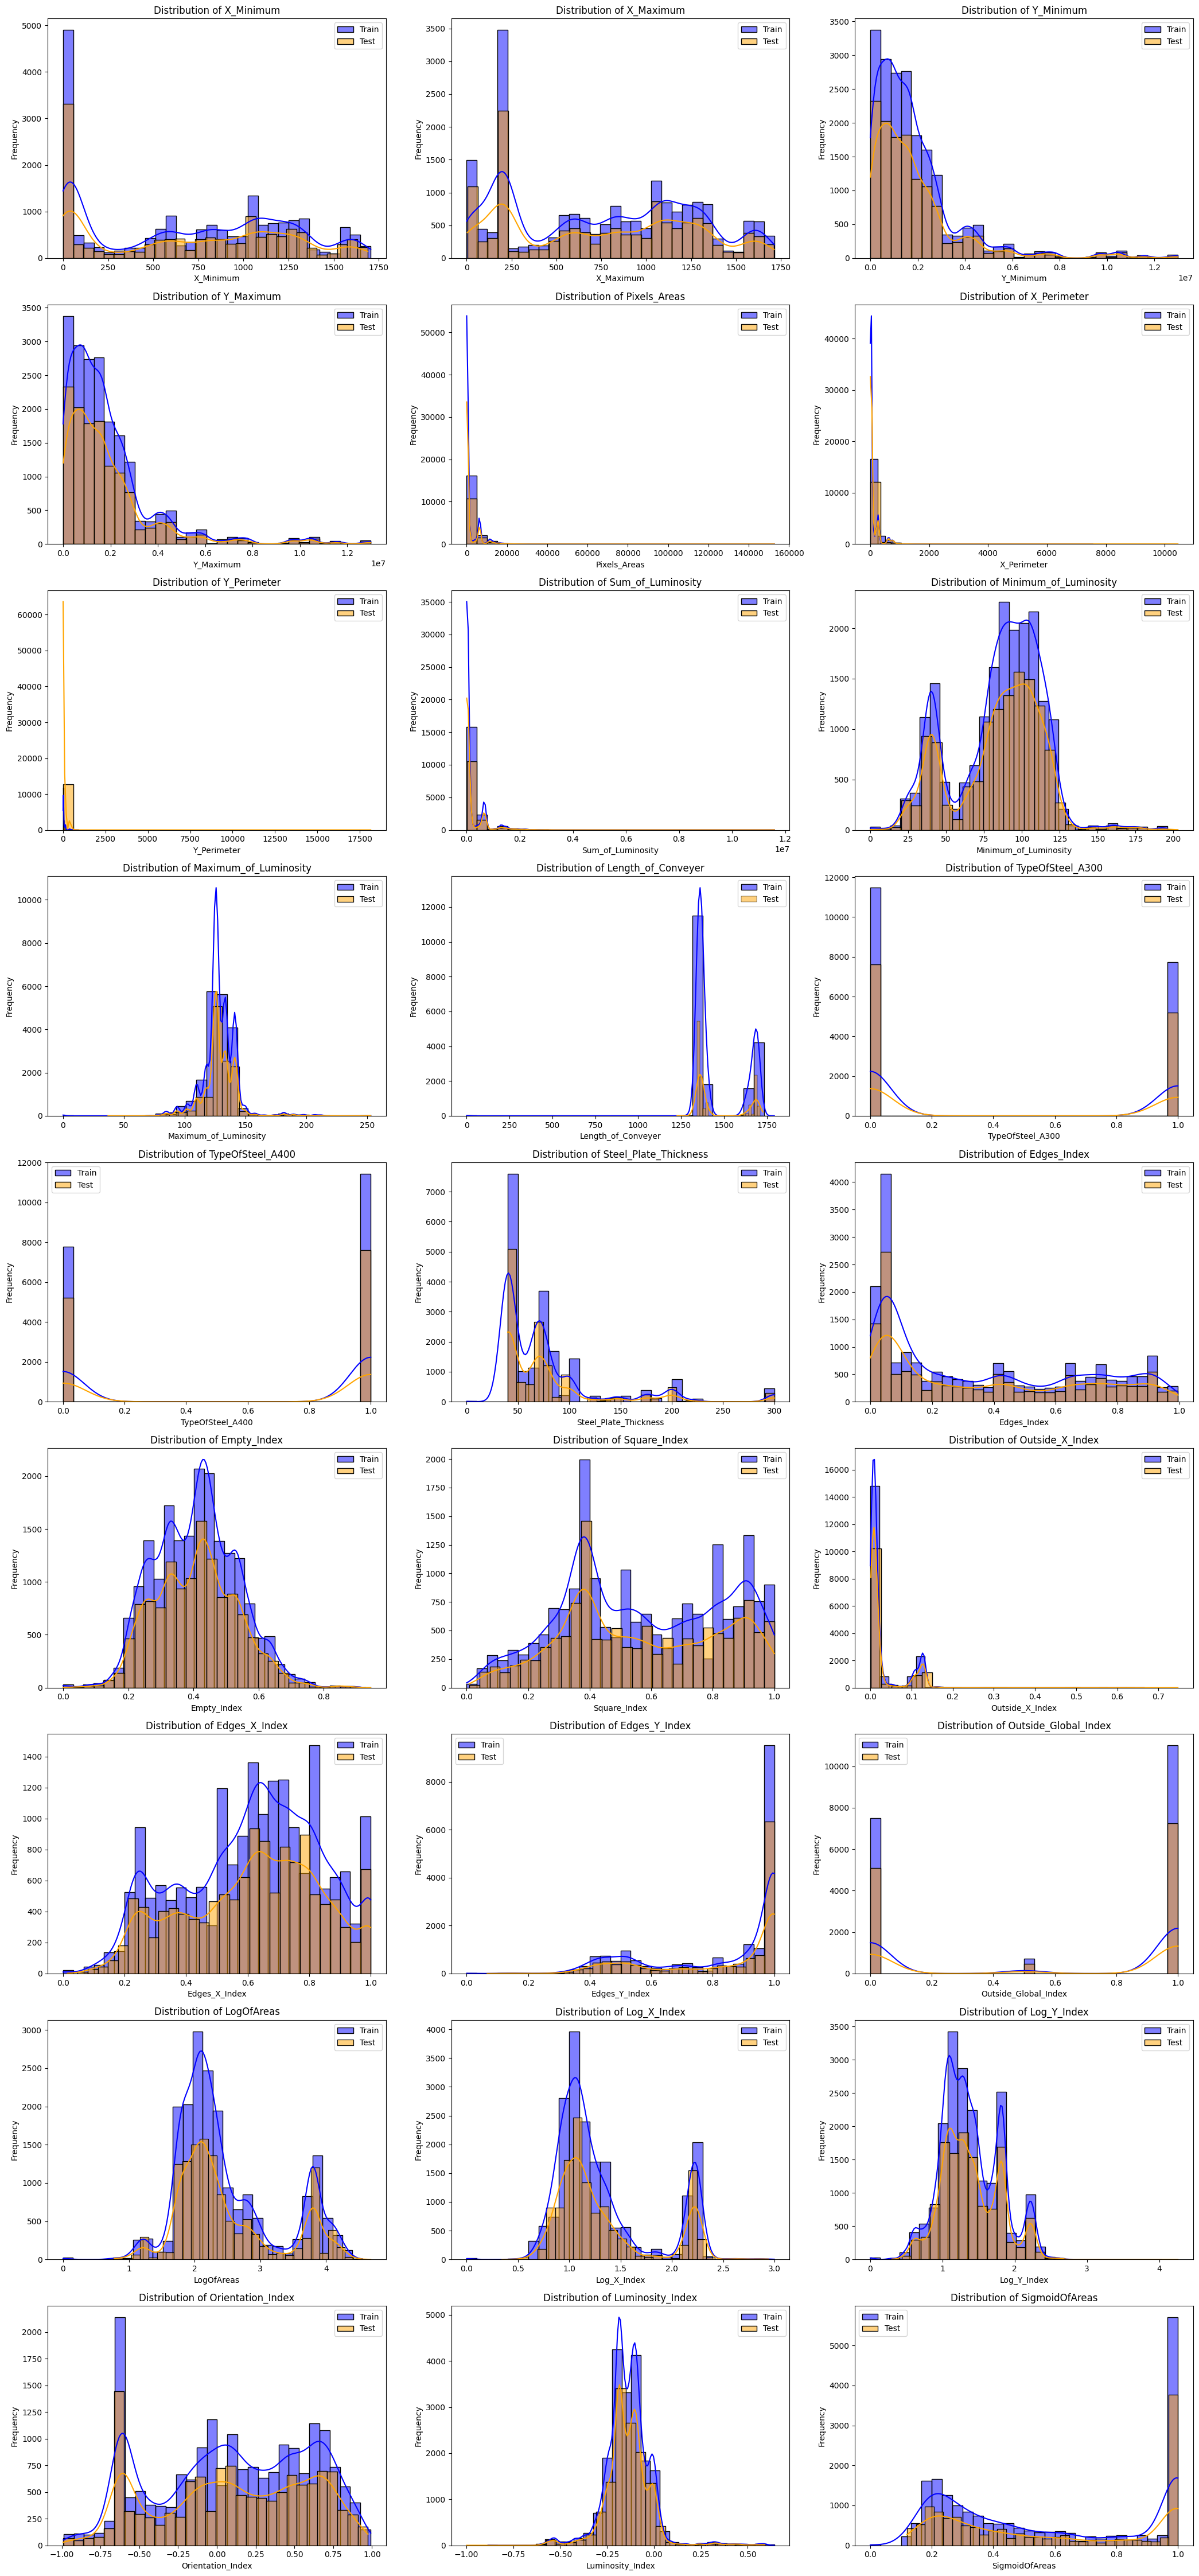

In [26]:
train_copy=train.copy()
test_copy=test.copy()
cont_cols = test.columns
colors = ['blue', 'orange', 'green']  

num_plots = len(cont_cols)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(cont_cols):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.histplot(train_copy[feature], kde=True, color=colors[0], label='Train', alpha=0.5, bins=30, ax=ax)
    sns.histplot(test_copy[feature], kde=True, color=colors[1], label='Test', alpha=0.5, bins=30, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

/var/folders/0h/84284h294lgcqzymxd7xqvh00000gn/T/ipykernel_1643/673918201.py:6: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=target_counts.index, x=target_counts.values, hue=target_counts.index, palette=colors, legend=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get

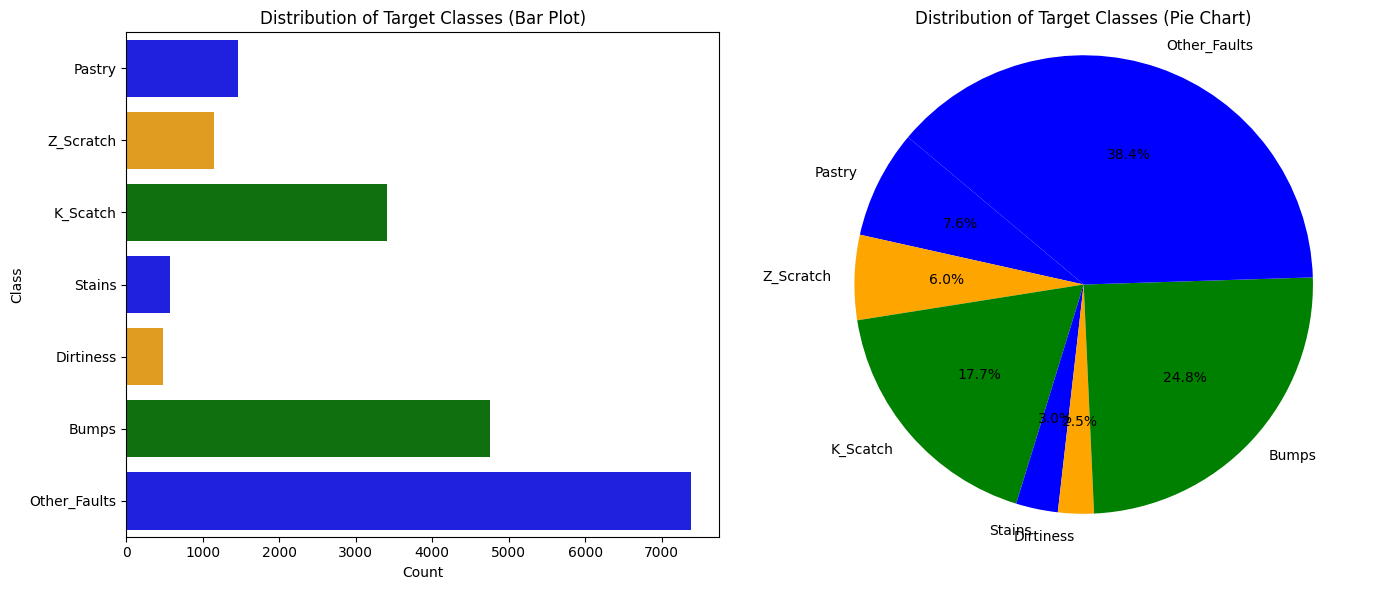

In [27]:
target_counts = train[targets].sum()

# Plot horizontal bar plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(y=target_counts.index, x=target_counts.values, hue=target_counts.index, palette=colors, legend=False)
plt.title('Distribution of Target Classes (Bar Plot)')
plt.xlabel('Count')
plt.ylabel('Class')

# Plot pie chart
plt.subplot(1, 2, 2)
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')
plt.title('Distribution of Target Classes (Pie Chart)')

plt.tight_layout()
plt.show()

